In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
df=pd.read_csv('911.csv')

In [5]:
df.info

<bound method DataFrame.info of               lat        lng  \
0       40.297876 -75.581294   
1       40.258061 -75.264680   
2       40.121182 -75.351975   
3       40.116153 -75.343513   
4       40.251492 -75.603350   
...           ...        ...   
663517  40.157956 -75.348060   
663518  40.136306 -75.428697   
663519  40.013779 -75.300835   
663520  40.121603 -75.351437   
663521  40.015046 -75.299674   

                                                     desc      zip  \
0       REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1       BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2       HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3       AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4       CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                   ...      ...   
663517  SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...  19403.0   
663518  EAGLEVILLE RD &

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df['zip'].count()

583323

In [8]:
df['zip'].value_counts().head(5)  #top 5 zip codes 

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [9]:
df['twp'].value_counts().head(5) #top 5 townships

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [15]:
df['title'].nunique() #no. of unique titles

148

In [17]:
df['Reason']=df['title'].apply(lambda x:x.split(':')[0])

In [18]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

In [19]:
df['Reason'].max()

'Traffic'

In [20]:
df['Reason'].value_counts().head(1)

EMS    332692
Name: Reason, dtype: int64

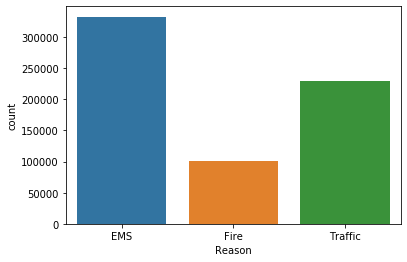

In [22]:

sns.countplot(x='Reason',data=df)  #counplot for Reason 

In [29]:
df['timeStamp']=pd.to_datetime(df['timeStamp']);

In [30]:
type(df['timeStamp'])

pandas.core.series.Series

In [31]:
time=df['timeStamp'].iloc[0] 

In [32]:
time.year

2015

In [33]:
del(df['timestamp'])

In [35]:
df['hour']=df['timeStamp'].apply(lambda x: x.hour)

In [44]:
df['Month']=df['timeStamp'].apply(lambda x: x.month)
df['Day of Week']=df['timeStamp'].apply(lambda x: x.dayofweek)


In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,2015,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,2015,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,2015,12,3


In [38]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [46]:
df['Day of Week']=df['Day of Week'].map(dmap)   #converting the day into a string day

In [47]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,year,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,2015,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,2015,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,2015,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,2015,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,2015,12,Thu


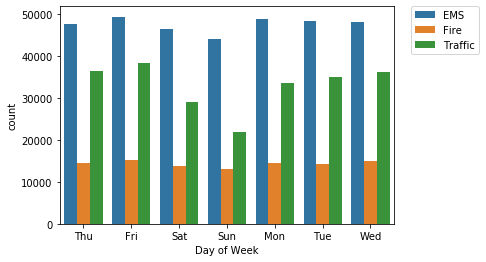

In [50]:
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)  #statement to get the legend out of the box

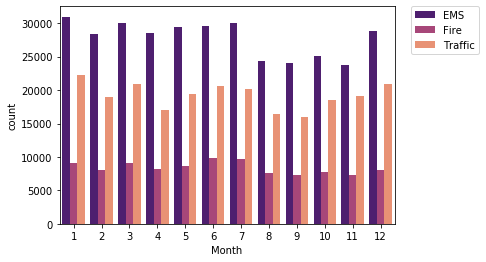

In [54]:
sns.countplot(x='Month',data=df,hue='Reason',palette='magma')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [55]:
bymonth=df.groupby('Month').count()  #trying to group by a particular coloumn

In [56]:
bymonth.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,year,Day of Week
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509,57509


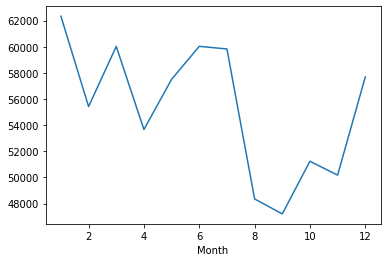

In [57]:
bymonth['lng'].plot()  #plot of count of calls per month, i assumed if there is a longitude of call , the call definitely exists

In [67]:
#now here i was trying to call a lmplot with x='Month' but thats not actually a column after groupby therefore ill reset the month as a col using reset index
bymonth.reset_index(inplace=True)

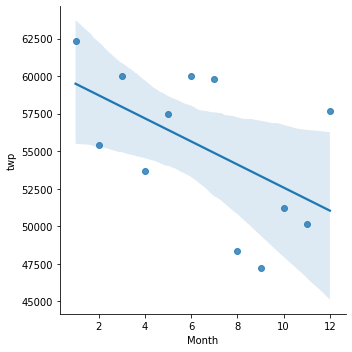

In [64]:
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index()) #now this will work as month is back as a column

In [68]:
 t=df['timeStamp'].iloc[0]

In [69]:
t

Timestamp('2015-12-10 17:10:52')

In [70]:
t.date()

datetime.date(2015, 12, 10)

In [71]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [72]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: Date, Length: 663522, dtype: object

In [73]:
 df.groupby('Date').count().head()  #grouping by this date colomn with count aggregate to create a plot of counts of 911 calls,i.e this counts all instances per date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,year,Month,Day of Week
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


In [75]:
 df.groupby('Date').count().head()['lat']

Date
2015-12-10    114
2015-12-11    391
2015-12-12    402
2015-12-13    316
2015-12-14    444
Name: lat, dtype: int64

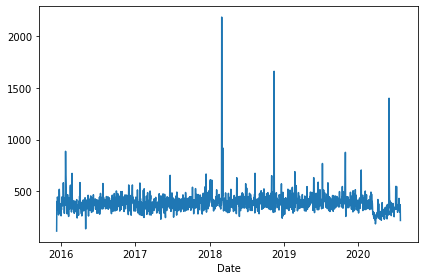

In [82]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [83]:
#Now my aim is to create three separate plots with eaxh plot representing the reason for the 911 call

Text(0.5, 1, 'Traffic')

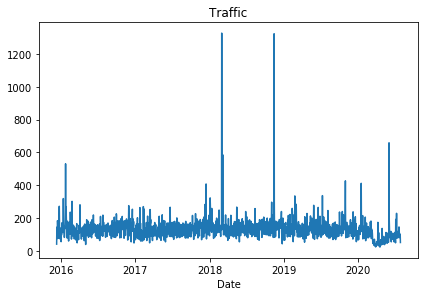

In [97]:
#therefore for separate reasons i will need conditional selection
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1, 'EMS')

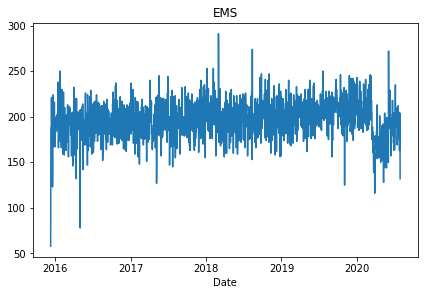

In [99]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

Text(0.5, 1, 'Fire')

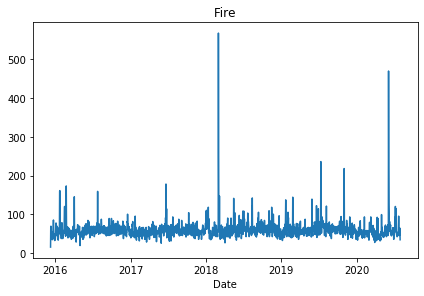

In [100]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

In [102]:
# moving on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I tired  to combine groupby with an unstack method.
df.groupby(by=['Day of Week','hour']).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week hour                                                               
Fri         0     1983  1983  1983  1752   1983       1983  1981  1983  1983   
            1     1635  1635  1635  1451   1635       1635  1632  1635  1635   
            2     1449  1449  1449  1311   1449       1449  1449  1449  1449   
            3     1296  1296  1296  1173   1296       1296  1296  1296  1296   
            4     1339  1339  1339  1227   1339       1339  1338  1339  1339   
...                ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wed         19    4686  4686  4686  4165   4686       4686  4684  4686  4686   
            20    4116  4116  4116  3661   4116       4116  4113  4116  4116   
            21    3537  3537  3537  3143   3537       3537  3530  3537  3537   
            22    2826  2826  2826  2511   2826       2826  2825  2826  2826   
            23    2207  2207  2207  1965   2207       2207  2204  2207  2207   

                  Reason  year  Month  Date  
Day of Week hour                             
Fri         0       1983  1983   1983  1983  
            1       1635  1635   1635  1635  
            2       1449  1449   1449  1449  
            3       1296  1296   1296  1296  
            4       1339  1339   1339  1339  
...                  ...   ...    ...   ...  
Wed         19      4686  4686   4686  4686  
            20      4116  4116   4116  4116  
            21      3537  3537   3537  3537  
            22      2826  2826   2826  2826  
            23      2207  2207   2207  2207  

[168 rows x 13 columns]

In [103]:
df.groupby(by=['Day of Week','hour']).count()['Reason']

Day of Week  hour
Fri          0       1983
             1       1635
             2       1449
             3       1296
             4       1339
                     ... 
Wed          19      4686
             20      4116
             21      3537
             22      2826
             23      2207
Name: Reason, Length: 168, dtype: int64

In [104]:
df.groupby(by=['Day of Week','hour']).count()['Reason'].unstack()  #unstack allows to convert in matrix form

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


In [105]:
day_hour=df.groupby(by=['Day of Week','hour']).count()['Reason'].unstack()

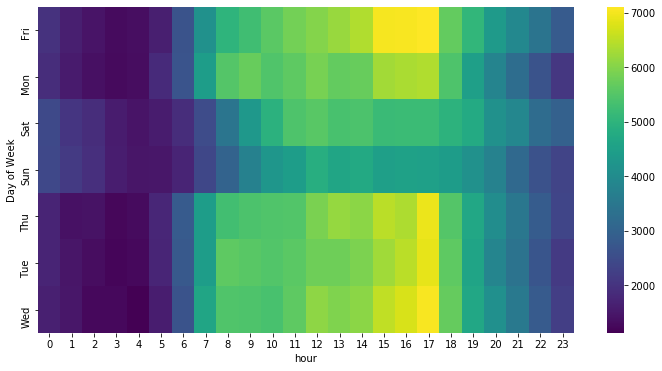

In [110]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')

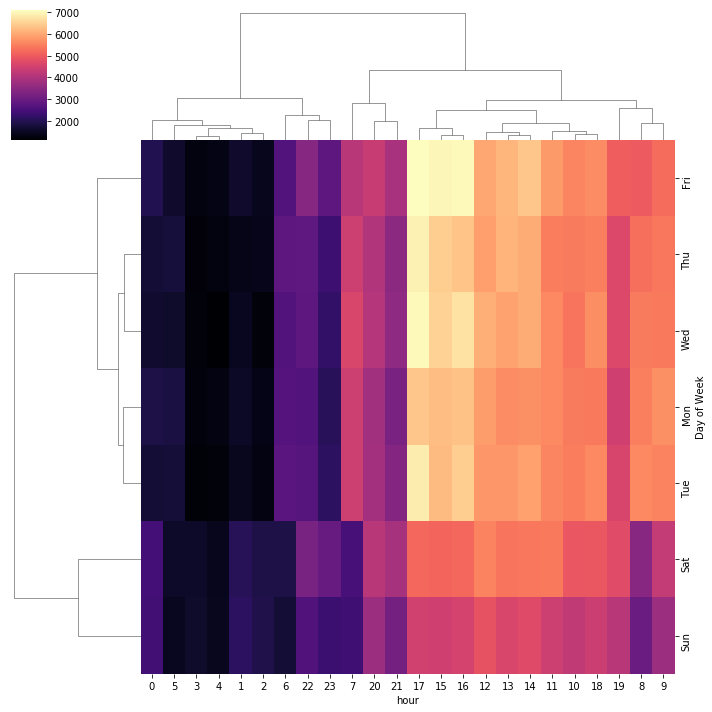

In [111]:
sns.clustermap(day_hour,cmap='magma')

In [112]:
df.groupby(by=['Day of Week','Month']).count()  #same thing by month now instead of hour

lat    lng   desc   zip  title  timeStamp    twp   addr  \
Day of Week Month                                                              
Fri         1       9309   9309   9309  8238   9309       9309   9305   9309   
            2       8255   8255   8255  7291   8255       8255   8251   8255   
            3      10941  10941  10941  9745  10941      10941  10932  10941   
            4       7997   7997   7997  7015   7997       7997   7995   7997   
            5       8904   8904   8904  7811   8904       8904   8899   8904   
...                  ...    ...    ...   ...    ...        ...    ...    ...   
Wed         8       7984   7984   7984  6967   7984       7984   7979   7984   
            9       6844   6844   6844  6059   6844       6844   6842   6844   
            10      7876   7876   7876  6879   7876       7876   7871   7876   
            11      7410   7410   7410  6531   7410       7410   7407   7410   
            12      7682   7682   7682  6788   7682       7682   7677   7682   

                       e  Reason   hour   year   Date  
Day of Week Month                                      
Fri         1       9309    9309   9309   9309   9309  
            2       8255    8255   8255   8255   8255  
            3      10941   10941  10941  10941  10941  
            4       7997    7997   7997   7997   7997  
            5       8904    8904   8904   8904   8904  
...                  ...     ...    ...    ...    ...  
Wed         8       7984    7984   7984   7984   7984  
            9       6844    6844   6844   6844   6844  
            10      7876    7876   7876   7876   7876  
            11      7410    7410   7410   7410   7410  
            12      7682    7682   7682   7682   7682  

[84 rows x 13 columns]

In [119]:
day_month=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

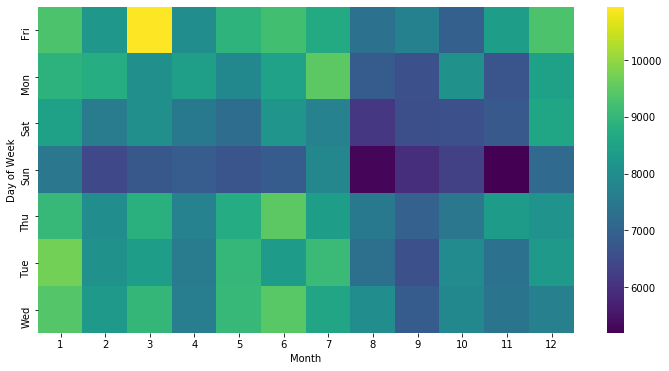

In [120]:
plt.figure(figsize=(12,6))
sns.heatmap(day_month,cmap='viridis')

<Figure size 864x432 with 0 Axes>

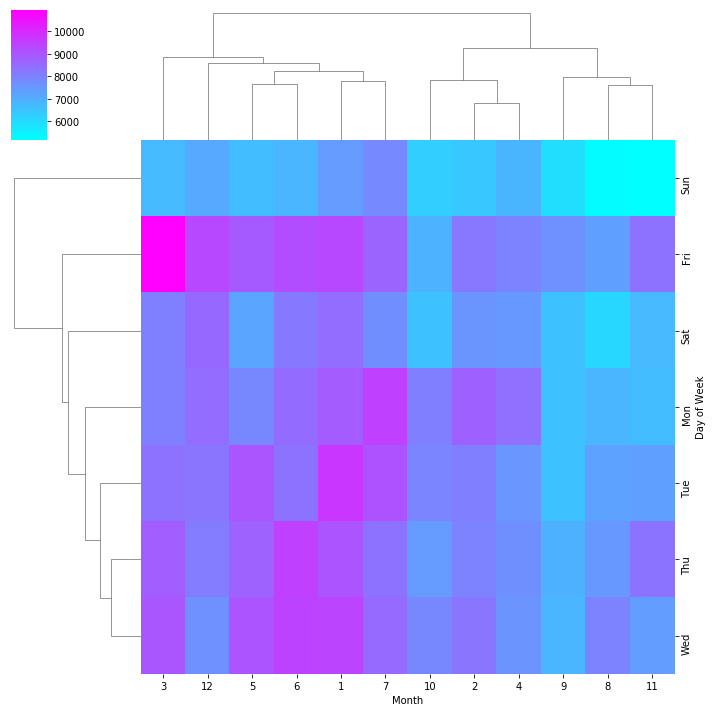

In [121]:
plt.figure(figsize=(12,6))
sns.clustermap(day_month,cmap='cool')